# Tarea: Análisis Visual de Ventas de Tienda de Conveniencia

### **Equipo:**

*   Mauricio Contreras Sepúlveda
*   Dianna Monsalve Pérez
*   Cristian Romero Saavedra
*   Elías Santacruz Yunga

### **Grupo:** 62
### **Curso:** Visualización de Datos en Python

## Descripción del Caso

Una cadena de tiendas de conveniencia quiere analizar sus ventas y el comportamiento de los clientes para mejorar su estrategia de marketing. Para ello, han recopilado un conjunto de datos que incluye información sobre las ventas, los productos y los clientes. Su misión será usar las técnicas de visualización de datos aprendidas para analizar y presentar los resultados de este conjunto de datos.

## Indicaciones Generales

1.  **Dataset:** Utilizarán el dataset "Supermarket Sales" disponible en Kaggle (data.csv).
2.  **Entorno:** Trabajen según las indicaciones de este notebook.
3.  **Colaboración:** Esta es una tarea grupal. Asegúrense de coordinar el trabajo.
4.  **Streamlit:** Se requiere crear un dashboard interactivo usando la librería Streamlit. Deberán escribir y ejecutar su código como script the python (archivo .py), pero deben también escribir el código en una celda dentro de éste jupyter notebook para su revisión.
5.  **Pensamiento Crítico:** Incluyan reflexiones y justificaciones para sus elecciones de visualización y análisis.
6.  **Entrega:** Entreguen este notebook completado según las indicaciones.

-----

## Desarrollo - Caso de aplicación (PDF)

## 1. Selección de Variables y desarrollo de Análisis


a.  Examinen el conjunto de datos proporcionado (`df.info()`, `df.describe()`, `df.columns`).

b.  Identifiquen y **justifiquen** las variables que consideren más relevantes para un análisis significativo del comportamiento de ventas y clientes. 

c.  Reflexionen sobre la importancia de cada variable seleccionada en el contexto del caso de estudio (¿Qué preguntas de negocio pueden ayudar a responder?).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import streamlit as st

-----

## 1\. Selección de Variables y desarrollo de Análisis

**a. Examinen el conjunto de datos proporcionado (`df.info()`, `df.describe()`, `df.columns`).**

In [4]:
# Cargar el conjunto de datos
df = pd.read_csv('data.csv')

# Convertir la columna 'Date' a tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convertir la columna 'Time' a tipo datetime.time
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time

# Examinen el conjunto de datos proporcionado
print("Información del DataFrame (df.info()):")
df.info()

print("\nEstadísticas descriptivas (df.describe()):")
print(df.describe())

print("\nColumnas del DataFrame (df.columns):")
print(df.columns)

print("\nPrimeras 5 filas del DataFrame (df.head()):")
print(df.head())

Información del DataFrame (df.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 

## Análisis Requeridos:

1.  **Evolución de las Ventas Totales:**
    *   **Objetivo:** Mostrar cómo han variado las ventas totales (`Total`) a lo largo del tiempo (`Date`).

2.  **Ingresos por Línea de Producto:**
    *   **Objetivo:** Comparar los ingresos (`Total`) generados por cada `Product line`.

3.  **Distribución de la Calificación de Clientes:**
    *   **Objetivo:** Analizar la distribución de las calificaciones (`Rating`) de los clientes.

4.  **Comparación del Gasto por Tipo de Cliente:**
    *   **Objetivo:** Comparar la distribución del gasto total (`Total`) entre clientes `Member` y `Normal`.

5.  **Relación entre Costo y Ganancia Bruta:**
    *   **Objetivo:** Visualizar la relación entre el costo de bienes vendidos (`cogs`) y el ingreso bruto (`gross income`).

6.  **Métodos de Pago Preferidos:**
    *   **Objetivo:** Identificar los métodos de pago (`Payment`) más frecuentes.

7.  **Análisis de Correlación Numérica:**
    *   **Objetivo:** Explorar relaciones lineales entre variables numéricas (`Unit price`, `Quantity`, `Tax 5%`, `Total`, `cogs`, `gross income`, `Rating`).

8.  **Composición del Ingreso Bruto por Sucursal y Línea de Producto:**
    *   **Objetivo:** Mostrar la contribución de cada `Product line` al `gross income` dentro de cada `Branch`.

---

## Requisitos Adicionales:
*   Implementación en Streamlit.
*   Gráficos claros (títulos, etiquetas).
*   Interactividad (filtros) donde sea apropiado.
*   Aplicación de buenas prácticas de visualización (claridad).

## Análisis Requeridos:

A continuación, se presentan los 8 análisis requeridos presentando el gráfico y su explicación.

### 1\. Evolución de las Ventas Totales:

  * **Objetivo:** Mostrar cómo han variado las ventas totales (`Total`) a lo largo del tiempo (`Date`).

<!-- end list -->

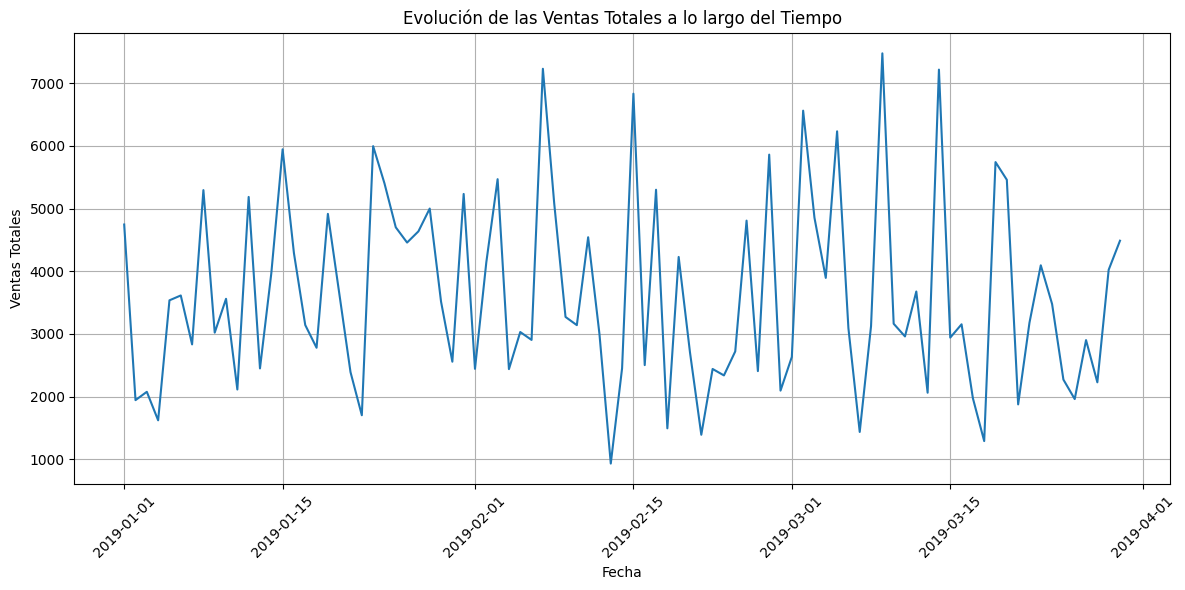

In [34]:
# 1. Evolución de las Ventas Totales
plt.figure(figsize=(12, 6))
ventas_diarias = df.groupby('Date')['Total'].sum()
sns.lineplot(x=ventas_diarias.index, y=ventas_diarias.values)
plt.title('Evolución de las Ventas Totales a lo largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Explicación:**
Este gráfico de líneas muestra la suma de las ventas totales (`Total`) agrupadas por fecha (`Date`). Permite observar tendencias generales, picos o valles en las ventas a lo largo del período cubierto por los datos. La rotación de las etiquetas del eje X y la cuadrícula mejoran la legibilidad. Este tipo de gráfico es fundamental para entender el rendimiento general del negocio en el tiempo, como se discute en la "Unidad 1: Introducción a la Visualización de Información con Python" al hablar de gráficos de líneas para visualizar tendencias.


### 2\. Ingresos por Línea de Producto:

  * **Objetivo:** Comparar los ingresos (`Total`) generados por cada `Product line`.

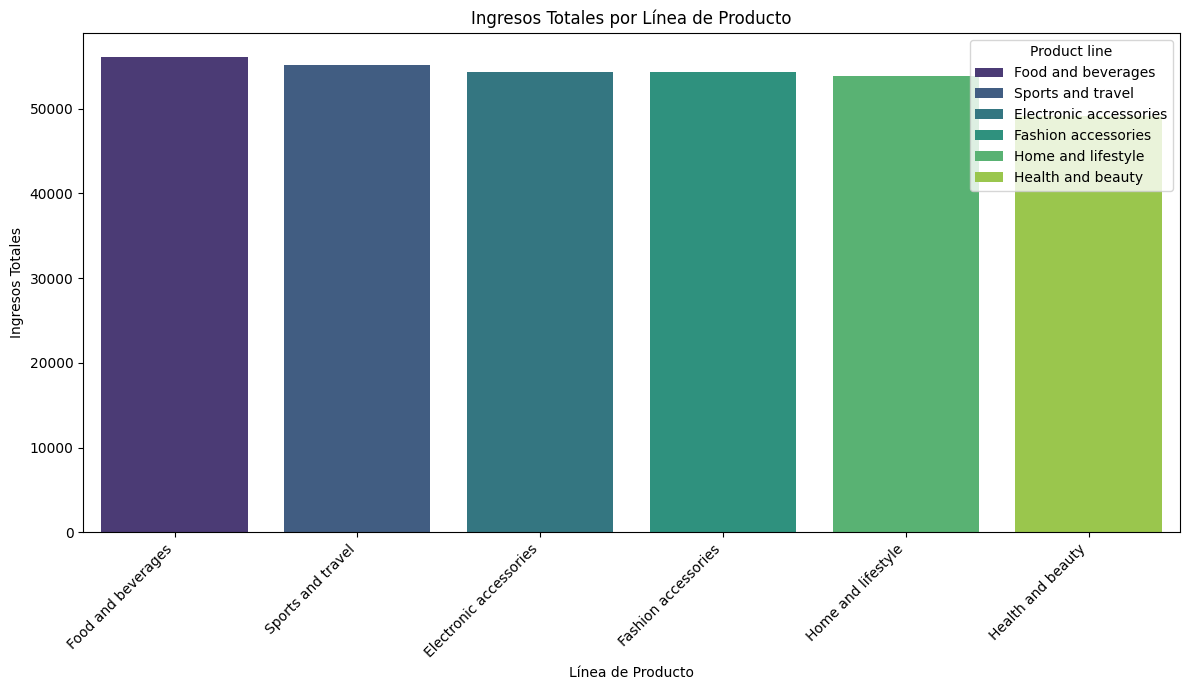

In [29]:
# 2. Ingresos por Línea de Producto
plt.figure(figsize=(12, 7))
ingresos_linea_producto = df.groupby('Product line')['Total'].sum().sort_values(ascending=False)
sns.barplot(x=ingresos_linea_producto.index,
            y=ingresos_linea_producto.values,
            hue=ingresos_linea_producto.index,
            palette='viridis',
            legend=True)
plt.title('Ingresos Totales por Línea de Producto')
plt.xlabel('Línea de Producto')
plt.ylabel('Ingresos Totales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Explicación:**
Este gráfico de barras compara los ingresos totales generados por cada línea de producto. Las barras están ordenadas de mayor a menor ingreso para facilitar la identificación de las líneas más importantes. La rotación de las etiquetas en el eje X evita la superposición. Los gráficos de barras son ideales para comparar cantidades entre diferentes categorías, un concepto central de la "Unidad 1".

### 3\. Distribución de la Calificación de Clientes:

  * **Objetivo:** Analizar la distribución de las calificaciones (`Rating`) de los clientes.

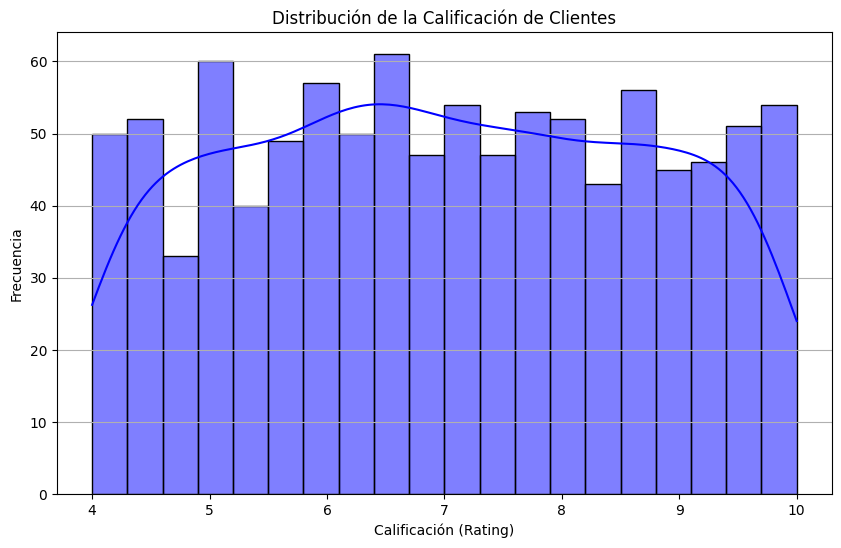

In [55]:
# 3. Distribución de la Calificación de Clientes
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True, color='blue', alpha=0.5)
plt.title('Distribución de la Calificación de Clientes')
plt.xlabel('Calificación (Rating)')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.show()

**Explicación:**
Este histograma muestra la frecuencia de las diferentes calificaciones otorgadas por los clientes. La curva KDE (Estimación de Densidad del Kernel) superpuesta ayuda a visualizar la forma de la distribución de manera más suave. `bins=20` divide el rango de calificaciones en 20 intervalos. Este análisis permite entender el nivel general de satisfacción del cliente. La "Unidad 1" describe histogramas y KDEs como herramientas para entender la distribución de variables numéricas.

### 4\. Comparación del Gasto por Tipo de Cliente:

  * **Objetivo:** Comparar la distribución del gasto total (`Total`) entre clientes `Member` y `Normal`.

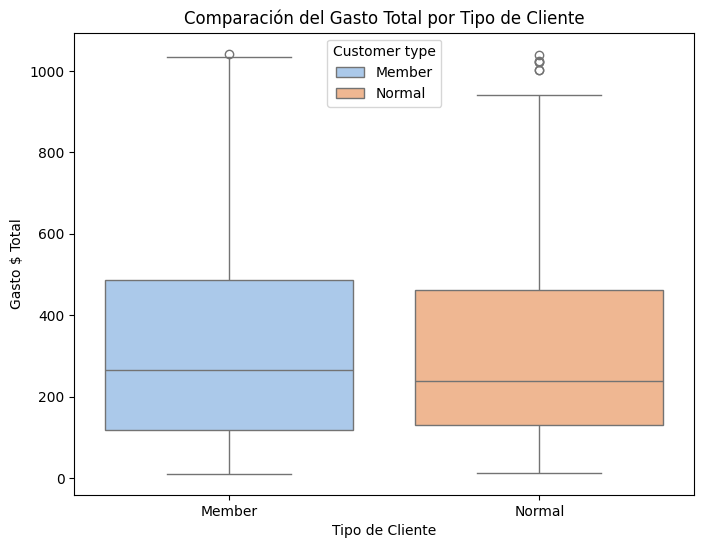

In [51]:
# 4. Comparación del Gasto por Tipo de Cliente
plt.figure(figsize=(8, 6))
sns.boxplot(x='Customer type',
            y='Total',
            hue='Customer type',
            data=df,
            palette='pastel',
            legend=True)
plt.title('Comparación del Gasto Total por Tipo de Cliente')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Gasto $ Total')
plt.show()

**Explicación:**
Se utiliza un diagrama de caja (box plot) para comparar la distribución del gasto total (`Total`) entre clientes miembros (`Member`) y normales (`Normal`). Este tipo de gráfico es eficaz para mostrar visualmente diferencias clave en la distribución de los datos para cada categoría de cliente. Específicamente, el box plot muestra:

* La **mediana** del gasto (la línea central dentro de la caja), que representa el valor central del gasto para cada tipo de cliente.
* Los **cuartiles**: la caja en sí abarca el rango intercuartílico (IQR), desde el primer cuartil (Q1, percentil 25) hasta el tercer cuartil (Q3, percentil 75). La longitud de la caja indica la dispersión del 50% central de los datos de gasto.
* Los **bigotes** (líneas que se extienden desde la caja) típicamente muestran el rango de los datos, excluyendo los valores atípicos.
* Cualquier **valor atípico** (puntos individuales más allá de los bigotes), que representan transacciones con gastos inusualmente altos o bajos en comparación con el resto de los clientes de ese tipo.

Este gráfico permite una comparación directa de cómo tienden a gastar los miembros versus los clientes normales, si un grupo tiene una mayor variabilidad en su gasto, o si hay más valores extremos en un grupo que en otro. El uso de diagramas de caja para comparar distribuciones entre diferentes categorías es una técnica estándar y efectiva, discutida en la "Unidad 1: Introducción a la Visualización de Información con Python".

### 5\. Relación entre Costo y Ganancia Bruta:

  * **Objetivo:** Visualizar la relación entre el costo de bienes vendidos (`cogs`) y el ingreso bruto (`gross income`).

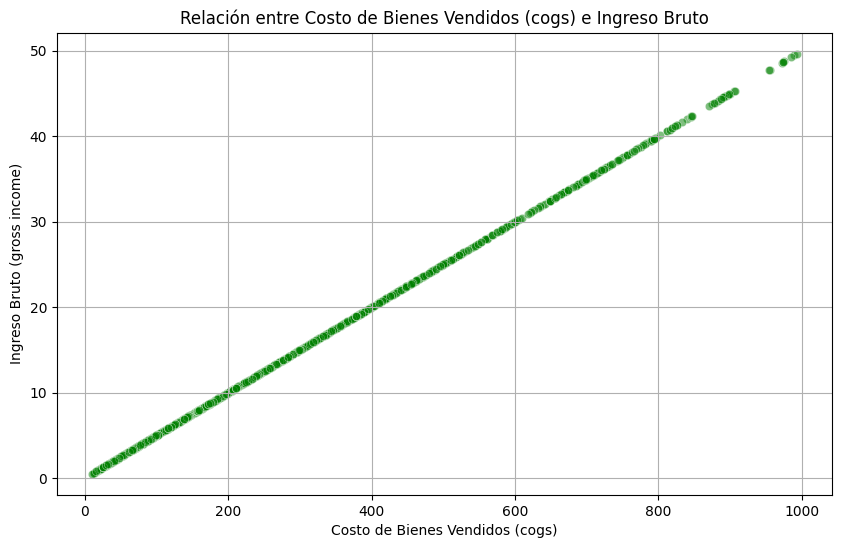

In [52]:
# 5. Relación entre Costo y Ganancia Bruta
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cogs', y='gross income', data=df, alpha=0.5, color='green')
plt.title('Relación entre Costo de Bienes Vendidos (cogs) e Ingreso Bruto')
plt.xlabel('Costo de Bienes Vendidos (cogs)')
plt.ylabel('Ingreso Bruto (gross income)')
plt.grid(True)
plt.show()

**Explicación:**
Un gráfico de dispersión se utiliza para explorar la relación entre el costo de los bienes vendidos (`cogs`) y el ingreso bruto (`gross income`). Cada punto representa una transacción. Este gráfico puede ayudar a identificar si existe una correlación lineal entre estas dos variables. La transparencia (`alpha=0.6`) ayuda a visualizar la densidad de puntos en caso de superposición. Los gráficos de dispersión son una herramienta clave para visualizar relaciones entre dos variables numéricas ("Unidad 1").

### 6\. Métodos de Pago Preferidos:

  * **Objetivo:** Identificar los métodos de pago (`Payment`) más frecuentes.

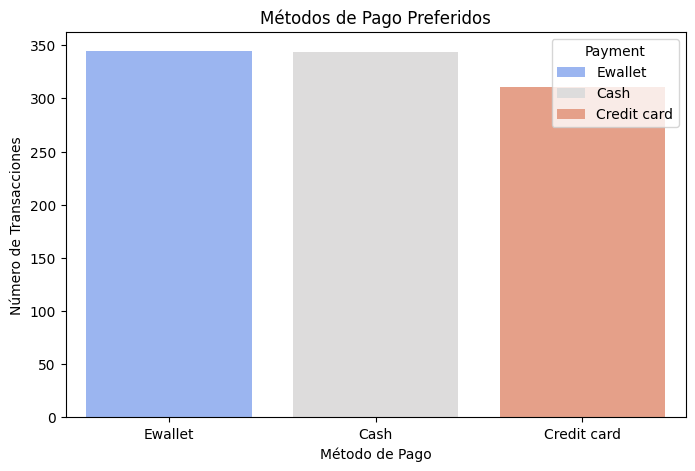

In [38]:
# 6. Métodos de Pago Preferidos
plt.figure(figsize=(8, 5))
payment_counts = df['Payment'].value_counts()
sns.barplot(x=payment_counts.index,
            y=payment_counts.values,
            hue=payment_counts.index,
            palette='coolwarm',
            legend=True)
plt.title('Métodos de Pago Preferidos')
plt.xlabel('Método de Pago')
plt.ylabel('Número de Transacciones')
plt.show()

**Explicación:**
Este gráfico de barras muestra la frecuencia de uso de cada método de pago. Permite identificar rápidamente cuáles son los métodos más populares entre los clientes. Los count plots o gráficos de barras basados en conteos son efectivos para variables categóricas ("Unidad 1").

### 7\. Análisis de Correlación Numérica:

  * **Objetivo:** Explorar relaciones lineales entre variables numéricas (`Unit price`, `Quantity`, `Tax 5%`, `Total`, `cogs`, `gross income`, `Rating`).

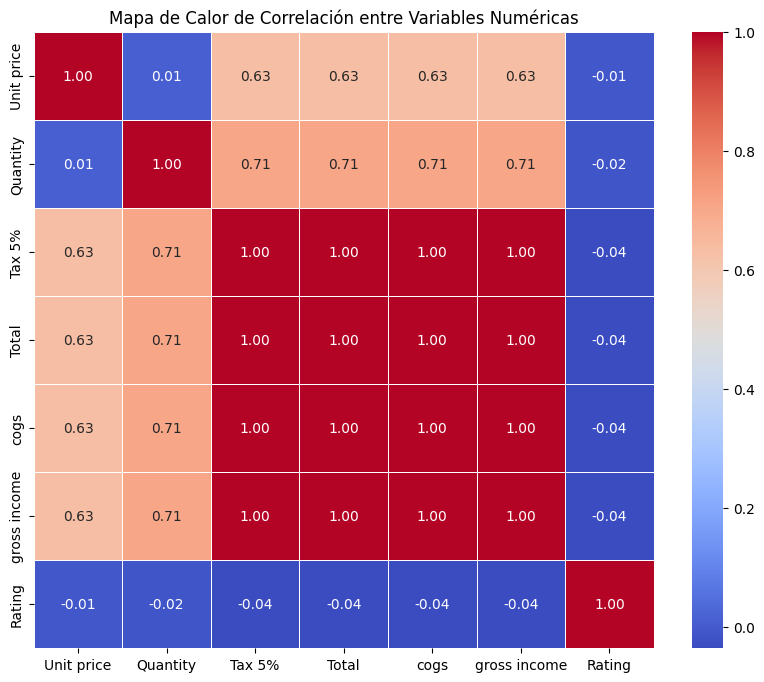

In [ ]:
# 7. Análisis de Correlación Numérica
variables_numericas = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating']
matriz_correlacion = df[variables_numericas].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de Correlación entre Variables Numéricas')
plt.show()

**Explicación:**
Un mapa de calor (heatmap) visualiza la matriz de correlación entre las variables numéricas seleccionadas. Los valores de correlación (entre -1 y 1) se representan con colores, y `annot=True` muestra los valores numéricos en cada celda. Esto facilita la identificación de relaciones lineales fuertes o débiles (positivas o negativas) entre pares de variables. Los heatmaps de correlación son una técnica poderosa para datos multivariados, como se menciona en la "Unidad 1" y se expande en la "Unidad 2".

### 8\. Composición del Ingreso Bruto por Sucursal y Línea de Producto:

  * **Objetivo:** Mostrar la contribución de cada `Product line` al `gross income` dentro de cada `Branch`.

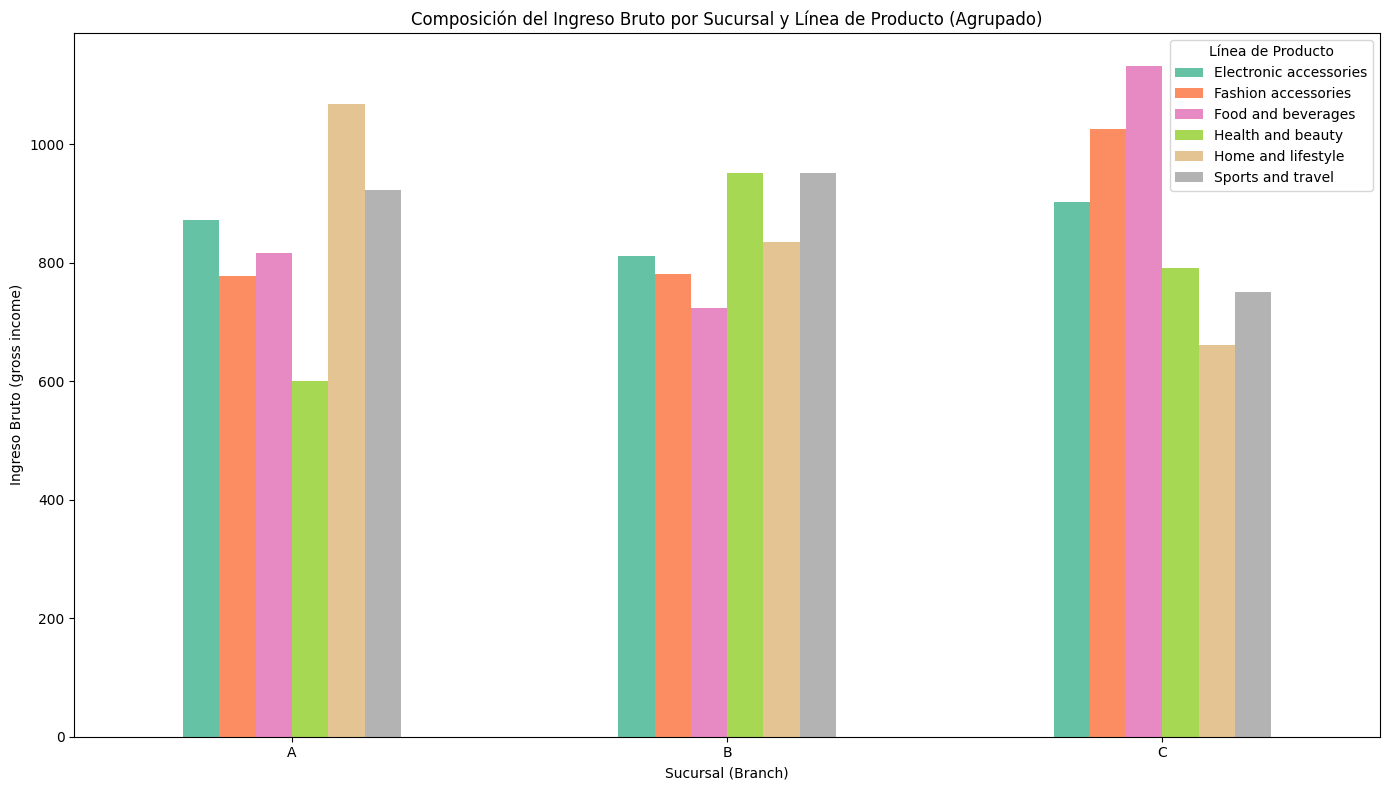

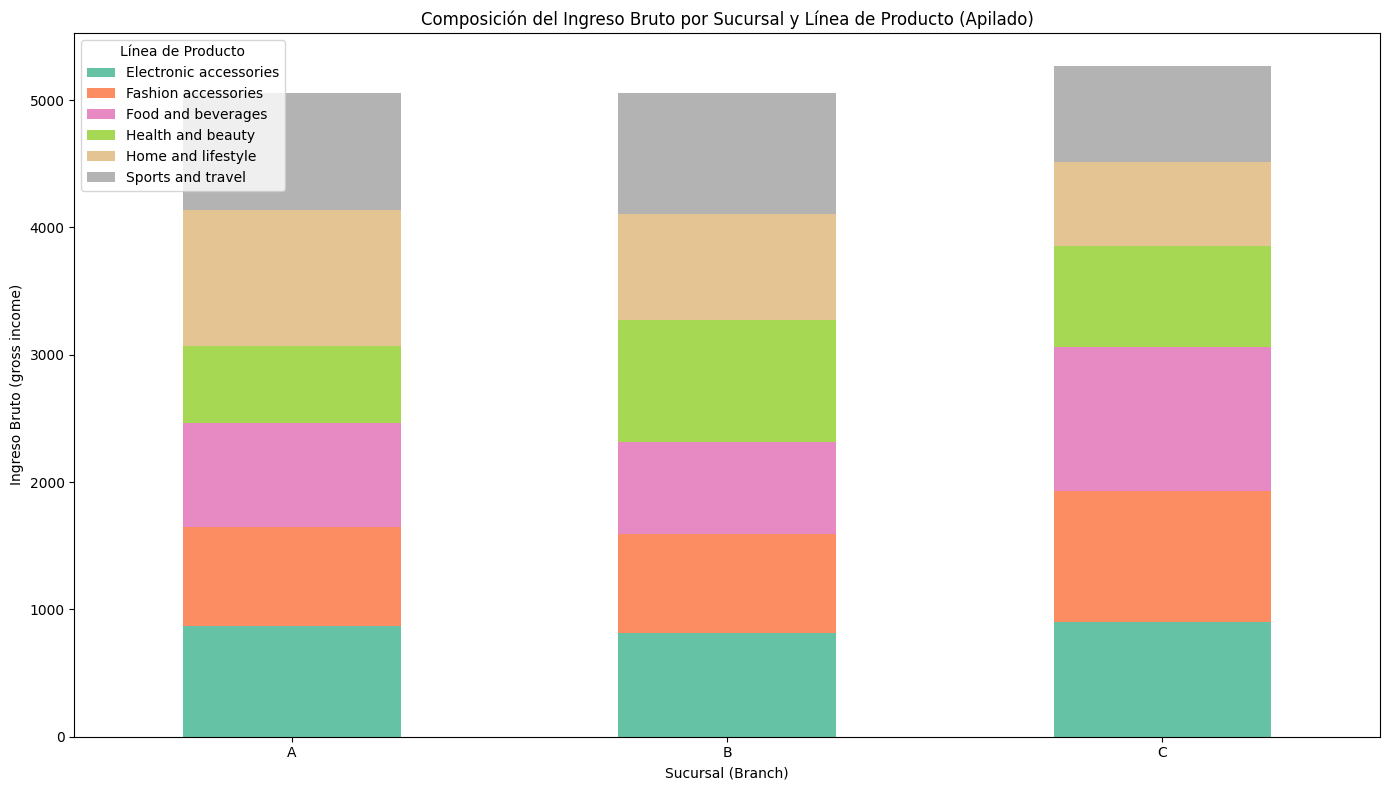

In [28]:
# 8. Composición del Ingreso Bruto por Sucursal y Línea de Producto
ingreso_sucursal_linea = df.groupby(['Branch', 'Product line'])['gross income'].sum().unstack()

ingreso_sucursal_linea.plot(kind='bar', stacked=False, figsize=(14, 8), colormap='Set2') # stacked=False para agrupadas
plt.title('Composición del Ingreso Bruto por Sucursal y Línea de Producto (Agrupado)')
plt.xlabel('Sucursal (Branch)')
plt.ylabel('Ingreso Bruto (gross income)')
plt.xticks(rotation=0)
plt.legend(title='Línea de Producto')
plt.tight_layout()
plt.show()

# Alternativa: Gráfico de barras apiladas
ingreso_sucursal_linea.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set2') # stacked=True para apiladas
plt.title('Composición del Ingreso Bruto por Sucursal y Línea de Producto (Apilado)')
plt.xlabel('Sucursal (Branch)')
plt.ylabel('Ingreso Bruto (gross income)')
plt.xticks(rotation=0)
plt.legend(title='Línea de Producto')
plt.tight_layout()
plt.show()

**Explicación:**
Se presentan dos opciones: un gráfico de barras agrupadas y uno de barras apiladas.

  * **Agrupadas (`stacked=False`):** Cada sucursal (`Branch`) tiene un grupo de barras, donde cada barra dentro del grupo representa una línea de producto (`Product line`) y su altura indica el ingreso bruto. Esto es bueno para comparar directamente el ingreso de diferentes líneas de producto dentro de una misma sucursal y entre sucursales.
  * **Apiladas (`stacked=True`):** Cada sucursal tiene una única barra, y los segmentos de esa barra representan el ingreso bruto de cada línea de producto. Esto es útil para ver la contribución de cada línea de producto al ingreso total de la sucursal y el ingreso total por sucursal.
    Ambos son gráficos compuestos que permiten visualizar múltiples variables categóricas y una numérica, un tema abordado en la "Unidad 2". La elección entre agrupado y apilado depende de qué aspecto de la comparación se quiera enfatizar.

-----

## 2\. Visualización Básica de Datos

Aquí se explorarán algunas visualizaciones básicas adicionales para complementar los 8 análisis requeridos, enfocándose en la distribución y relaciones entre variables clave.

* **a. Generar gráficos básicos como gráficos de líneas, de dispersión y box plots.**
* **b. Utilicen estos gráficos para explorar la distribución y las relaciones entre las variables seleccionadas.**
* **c. Discutan brevemente qué revelan estos gráficos básicos sobre el conjunto de datos.**

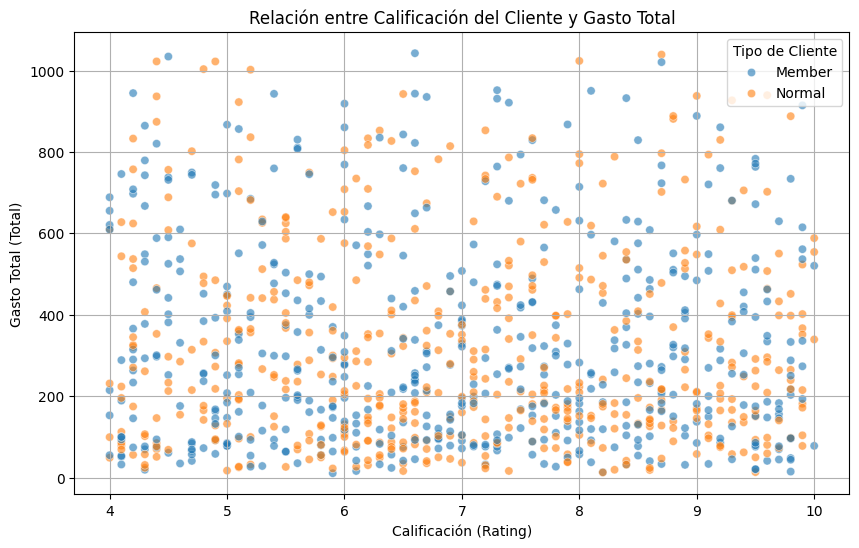

In [56]:
# Gráfico de dispersión - Calificación vs. Gasto Total
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Total', data=df, hue='Customer type', alpha=0.6)
plt.title('Relación entre Calificación del Cliente y Gasto Total')
plt.xlabel('Calificación (Rating)')
plt.ylabel('Gasto Total (Total)')
plt.grid(True)
plt.legend(title='Tipo de Cliente')
plt.show()

**Discusión:** Este gráfico de dispersión explora si hay una relación visible entre la calificación que los clientes dan y cuánto gastan. Al diferenciar por Customer type usando el parámetro hue, podemos también observar si este patrón difiere entre miembros y clientes normales. A primera vista, no parece haber una correlación lineal fuerte y clara entre la calificación y el gasto total, aunque podría haber clusters o tendencias sutiles que un análisis más profundo (o diferentes tipos de gráficos) podría revelar. Los clientes con calificaciones muy altas (cercanas a 10) parecen tener una dispersión amplia en sus gastos.

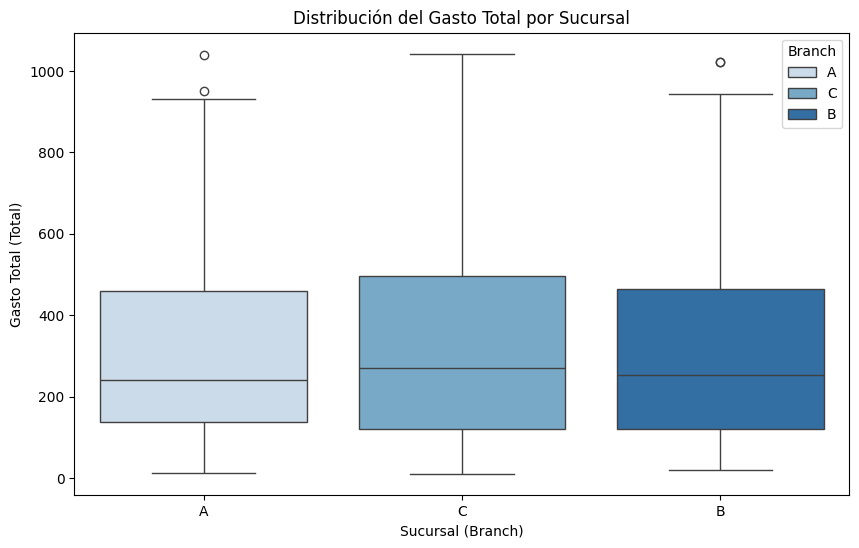

In [60]:
# Box plot - Gasto Total por Sucursal (Branch)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Branch',
            y='Total',
            hue='Branch',
            data=df,
            palette='Blues',
            legend=True)
plt.title('Distribución del Gasto Total por Sucursal')
plt.xlabel('Sucursal (Branch)')
plt.ylabel('Gasto Total (Total)')
plt.show()

**Discusión:** Este box plot compara la distribución del gasto total (Total) entre las diferentes sucursales (Branch). Permite observar si hay diferencias en la mediana del gasto, la dispersión (rango intercuartílico) y la presencia de valores atípicos entre las sucursales. Esto podría indicar, por ejemplo, si una sucursal atiende a clientes que gastan más en promedio o si tiene una mayor variabilidad en los montos de las transacciones. A partir de la "Unidad 1", los box plots son excelentes para comparar distribuciones de una variable numérica a través de diferentes categorías.

-----

## 3\. Gráficos Compuestos y Contextualización

Desarrollar visualizaciones más complejas que combinen múltiples variables o gráficos para una comprensión más profunda.

* **a. Desarrollen visualizaciones más complejas.**
* **b. Expliquen cómo estas visualizaciones compuestas proporcionan una comprensión más profunda.**
* **c. Argumenten la elección de estas visualizaciones en términos de la claridad y la información que aportan.**

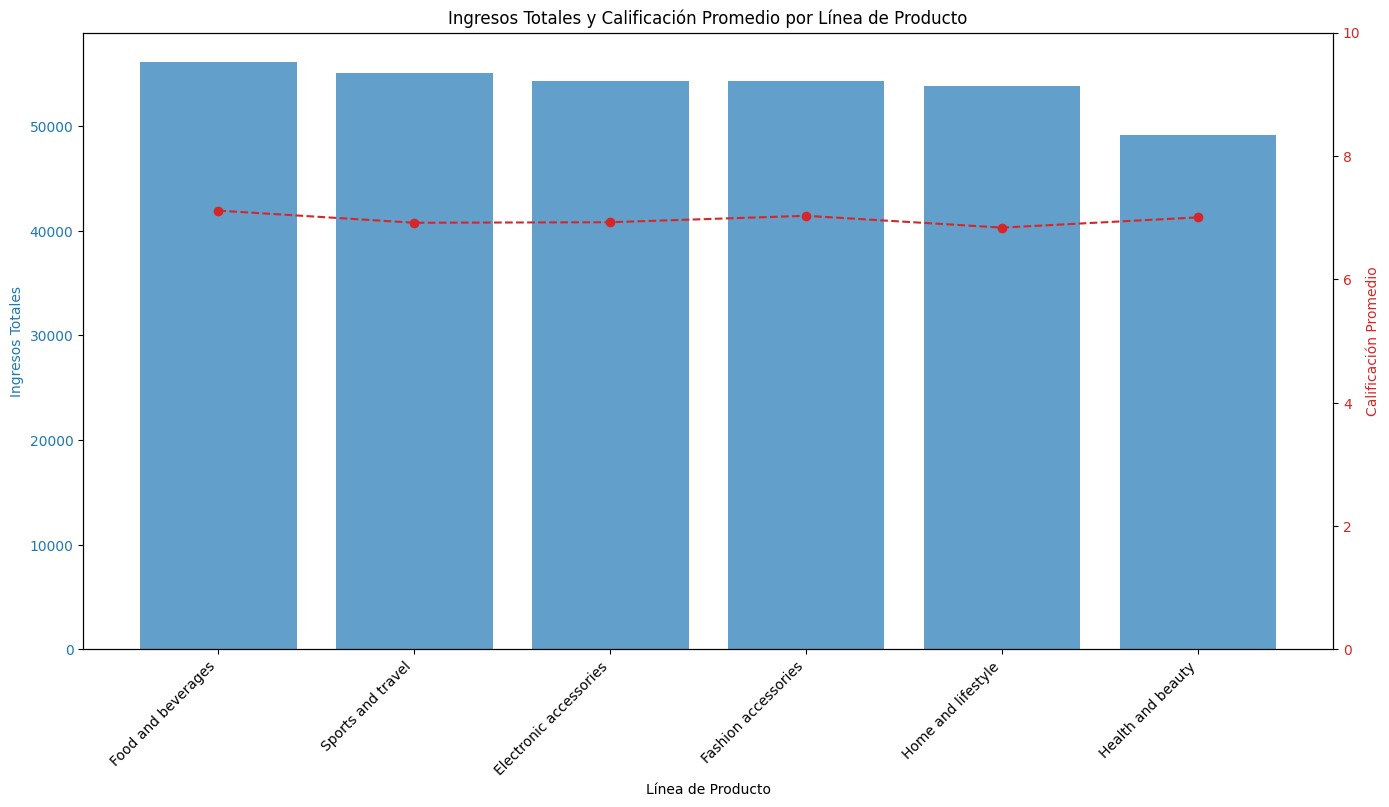

In [63]:
# Gráfico Compuesto: Ingresos por Línea de Producto y Calificación Promedio
ingresos_por_linea = df.groupby('Product line')['Total'].sum().sort_values(ascending=False)
rating_promedio_linea = df.groupby('Product line')['Rating'].mean().reindex(ingresos_por_linea.index)

fig, ax1 = plt.subplots(figsize=(14, 8))

color = 'tab:blue'
ax1.set_xlabel('Línea de Producto')
ax1.set_ylabel('Ingresos Totales', color=color)

tick_positions = np.arange(len(ingresos_por_linea.index))
ax1.bar(tick_positions, ingresos_por_linea.values, color=color, alpha=0.7, width=0.8)

ax1.tick_params(axis='y', labelcolor=color)

ax1.set_xticks(tick_positions)
ax1.set_xticklabels(ingresos_por_linea.index, rotation=45, ha='right')

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Calificación Promedio', color=color)
ax2.plot(tick_positions, rating_promedio_linea.values, color=color, marker='o', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 10)

fig.tight_layout()
plt.title('Ingresos Totales y Calificación Promedio por Línea de Producto')
plt.show()

**Explicación y Argumentación:**
Esta visualización compuesta combina un gráfico de barras (ingresos totales por línea de producto) con un gráfico de líneas (calificación promedio por línea de producto) utilizando dos ejes Y.

  * **Comprensión más profunda:** Permite analizar simultáneamente dos métricas clave para cada línea de producto: su rendimiento económico (ingresos) y la satisfacción del cliente (calificación). Podríamos identificar líneas de producto que son muy rentables pero tienen bajas calificaciones (lo que podría indicar un problema a largo plazo) o productos con altas calificaciones pero bajos ingresos (lo que podría sugerir una oportunidad de marketing o un nicho de mercado).
  * **Elección de la visualización:** Se eligió un gráfico de barras para los ingresos porque es efectivo para comparar magnitudes entre categorías. El gráfico de líneas superpuesto para la calificación permite ver la tendencia de satisfacción a través de las mismas categorías de productos sin saturar la visualización. El uso de ejes Y separados es crucial cuando se grafican variables con diferentes escalas y unidades. Esta técnica de gráficos compuestos se alinea con los conceptos de la "Unidad 2" sobre cómo presentar múltiples facetas de los datos. Aporta claridad al mostrar ambas dimensiones de forma integrada, facilitando la identificación de correlaciones o divergencias entre popularidad económica y percepción del cliente.

-----

## 4\. Visualización de Datos Multivariados y de Alta Dimensionalidad

Aplicar técnicas avanzadas adecuadas para múltiples variables.

* **a. Apliquen técnicas avanzadas.**
* **b. Justifiquen la selección de estas técnicas y discutan cómo facilitan la interpretación.**

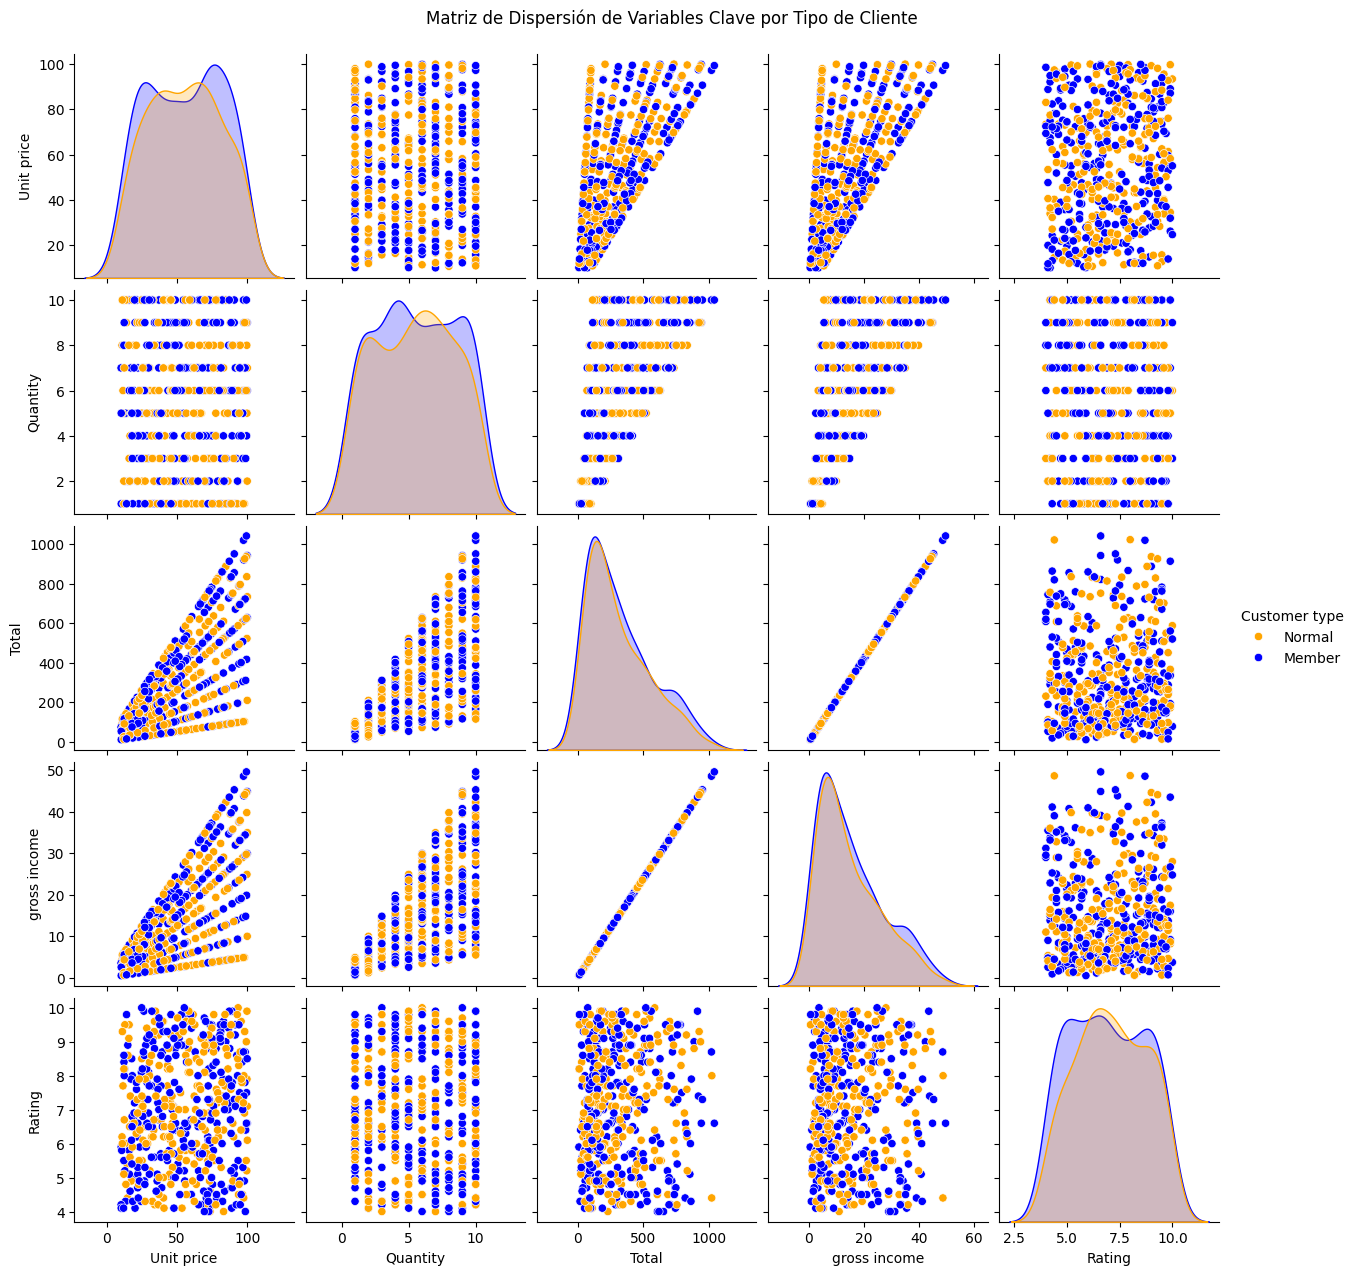

In [64]:
# Matriz de Dispersión (Pair Plot) para explorar relaciones entre variables numéricas clave,
# diferenciadas por tipo de cliente.
variables_pairplot = ['Unit price', 'Quantity', 'Total', 'gross income', 'Rating', 'Customer type']
df_sample_pairplot = df[variables_pairplot].sample(n=500, random_state=1) # Muestra para rendimiento

sns.pairplot(df_sample_pairplot, hue='Customer type', palette={'Member':'blue', 'Normal':'orange'}, diag_kind='kde')
plt.suptitle('Matriz de Dispersión de Variables Clave por Tipo de Cliente', y=1.02)
plt.show()

**Justificación y Discusión:**
Se utiliza una **matriz de dispersión (pair plot)** de Seaborn.

  * **Selección:** Esta técnica es ideal para visualizar las relaciones bivariadas entre múltiples variables numéricas simultáneamente. En la diagonal, muestra la distribución univariada de cada variable (en este caso, usando KDEs). Se añade la variable categórica `Customer type` con el parámetro `hue` para observar si las relaciones o distribuciones difieren entre miembros y clientes normales. Se toma una muestra de 500 datos para mejorar el rendimiento de la graficación sin perder la representatividad general de las relaciones.
  * **Facilita la interpretación:**
      * Permite una rápida identificación visual de correlaciones (positivas, negativas, inexistentes) entre pares de variables. Por ejemplo, se puede ver la fuerte relación lineal positiva esperada entre `Quantity` y `Total`, o entre `Total` y `gross income`.
      * Muestra cómo se distribuyen individualmente las variables (`Unit price`, `Rating`, etc.) para cada tipo de cliente.
      * Ayuda a detectar posibles agrupaciones o separaciones entre los tipos de clientes en los diferentes espacios bivariados.
      * Es una herramienta exploratoria poderosa para generar hipótesis sobre las interacciones de las variables antes de realizar análisis estadísticos más formales. Este enfoque es consistente con las técnicas para datos multivariados presentadas en la "Unidad 2".

-----

## 5\. Visualización en 3D

Elegir una variable o relación que se beneficiaría de una representación tridimensional.

* **a. Elijan una variable o una relación entre variables que se beneficiaría de una representación tridimensional.**
* **b. Expliquen por qué una visualización en 3D es apropiada y cómo puede revelar insights que podrían no ser evidentes en dos dimensiones.**
* **c. Presenten y discutan la visualización en 3D creada.**

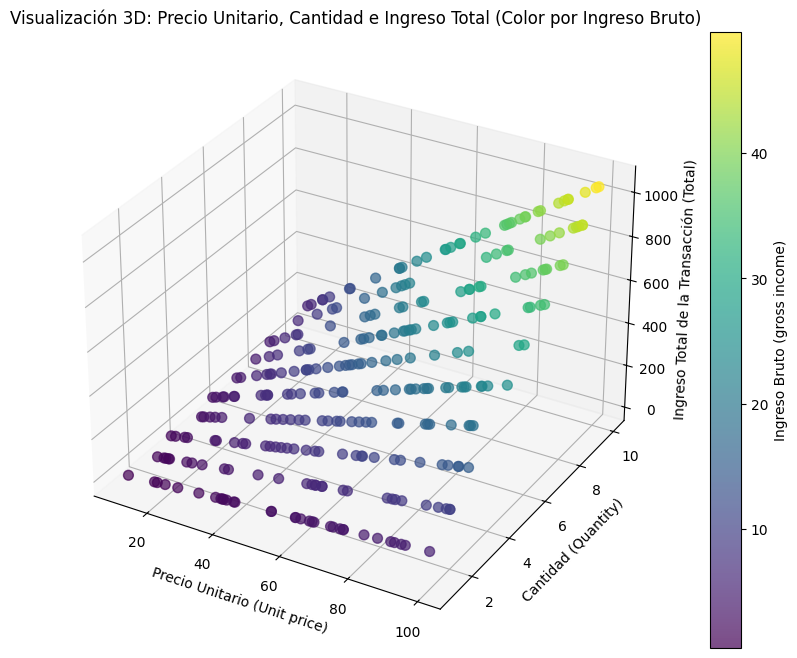

In [ ]:
# Visualización en 3D: Relación entre Precio Unitario, Cantidad e Ingreso Bruto
df_sample_3d = df.sample(n=300, random_state=42)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_sample_3d['Unit price'],
                     df_sample_3d['Quantity'],
                     df_sample_3d['Total'],
                     c=df_sample_3d['gross income'],
                     cmap='viridis',
                     alpha=0.7,
                     s=50) # s es el tamaño del punto

ax.set_xlabel('Precio Unitario (Unit price)')
ax.set_ylabel('Cantidad (Quantity)')
ax.set_zlabel('Ingreso Total de la Transacción (Total)')
ax.set_title('Visualización 3D: Precio Unitario, Cantidad e Ingreso Total (Color por Ingreso Bruto)')

cbar = fig.colorbar(scatter)
cbar.set_label('Ingreso Bruto (gross income)')

plt.show()

**Explicación y Discusión:**

  * **Variables elegidas:** Se ha elegido visualizar la relación entre `Unit price` (eje X), `Quantity` (eje Y) y `Total` (eje Z). Adicionalmente, el color de los puntos representa el `gross income`.
  * **Por qué 3D es apropiado:** El ingreso total de una transacción (`Total`) es fundamentalmente un producto de la cantidad vendida y su precio unitario (más impuestos). Una visualización 3D puede ayudar a entender cómo estas dos variables (`Unit price`, `Quantity`) interactúan para formar el `Total`. Al añadir el `gross income` como una dimensión de color, podemos también inferir visualmente la rentabilidad de diferentes combinaciones de precio y cantidad.
  * **Insights que podría revelar:**
      * Podríamos observar si existen "planos" o superficies donde se concentran las transacciones, indicando combinaciones comunes de precio y cantidad.
      * La coloración por `gross income` podría mostrar si las transacciones con mayor `Total` también son las que generan mayor `gross income`, o si hay combinaciones de precio/cantidad que resultan en un alto volumen de ventas (`Total`) pero bajo margen (`gross income`).
      * Podría ayudar a identificar segmentos de transacciones (ej. bajo precio/alta cantidad vs. alto precio/baja cantidad) y su impacto en el ingreso total y bruto.
  * **Discusión de la visualización 3D:** El gráfico de dispersión 3D muestra cada transacción como un punto en el espacio definido por el precio unitario, la cantidad y el ingreso total. El color de los puntos indica el ingreso bruto. Se observa que, como es de esperar, a medida que la cantidad y/o el precio unitario aumentan, el ingreso total tiende a aumentar. La coloración ayuda a ver que, en general, un mayor ingreso total también se asocia con un mayor ingreso bruto. Sin embargo, la interactividad sería muy útil aquí para rotar el gráfico y explorar diferentes ángulos, ya que las representaciones 3D estáticas pueden ocultar información. Como se menciona en la "Unidad 2", los gráficos 3D pueden ser atractivos pero deben usarse con cuidado para asegurar que aporten valor real al análisis.

-----

## 6\. Integración en un Dashboard (Acorde al PDF) -->


## 2. Integración en un Dashboard (Streamlit)

a.  Utilizando Streamlit, integren **algunas** de sus visualizaciones y hallazgos clave en un dashboard interactivo.

b.  Asegúrense de que el dashboard sea intuitivo y bien organizado (usen títulos, texto explicativo, widgets interactivos como sliders o selectores para filtrar datos).

c.  Reflexionen sobre cómo la interactividad del dashboard mejora la experiencia del usuario y el proceso de toma de decisiones basado en los datos presentados.

**Instrucciones:**
1.  Escriban el código completo de su aplicación Streamlit en la celda de código de abajo.
2.  Copien ese código a un archivo de texto simple llamado `dashboard_tarea.py` (o el nombre que prefieran).
3.  Abran una terminal o Anaconda Prompt, naveguen a la carpeta donde guardaron el archivo.
4.  Ejecuten el comando: `streamlit run dashboard_tarea.py`
5.  Interactúen con su dashboard en el navegador.
6.  **Importante:** En la celda de Markdown siguiente, describan su dashboard, qué visualizaciones incluye, qué interacciones permite, y adjunten el código de su script de python.

In [ ]:
# --- Describan su Dashboard (Gráficos Utilizados y Justificación de su uso) --- 

'''
**Descripción del Dashboard de Análisis de Ventas**

**Objetivo del Dashboard:**
El dashboard tiene como objetivo proporcionar una herramienta interactiva para que la cadena de tiendas de conveniencia explore sus datos de ventas y el comportamiento de los clientes. Busca facilitar la identificación de tendencias, patrones y áreas de oportunidad para mejorar la estrategia de marketing y la toma de decisiones basada en datos.

**Visualizaciones Incluidas y Justificación:**

1.  **Evolución de las Ventas Totales (Gráfico de Líneas):**
    * **Justificación:** Permite visualizar la tendencia general de las ventas a lo largo del tiempo. Es fundamental para entender el crecimiento, la estacionalidad y el impacto de eventos o campañas.
    * **Interactividad:** Filtro por rango de fechas para analizar periodos específicos.

2.  **Ingresos Totales por Línea de Producto (Gráfico de Barras):**
    * **Justificación:** Identifica rápidamente las líneas de producto más y menos rentables en términos de ingresos. Esencial para la gestión de inventario y estrategias de promoción.
    * **Interactividad:** Filtro por Sucursal (`Branch`) para comparar el rendimiento de las líneas de producto en diferentes ubicaciones.

3.  **Distribución de Calificaciones de Clientes (Histograma con KDE):**
    * **Justificación:** Muestra el nivel general de satisfacción del cliente. Ayuda a entender la percepción de la calidad del servicio o productos.
    * **Interactividad:** Filtro por Tipo de Cliente (`Customer type`) para ver si la satisfacción varía entre miembros y no miembros.

4.  **Comparación del Gasto por Tipo de Cliente (Box Plots):**
    * **Justificación:** Compara la distribución del gasto entre clientes miembros y normales. Clave para evaluar el valor del programa de membresía y segmentar clientes.
    * **Interactividad:** Selección de Sucursal (`Branch`) para analizar si el comportamiento de gasto por tipo de cliente varía geográficamente.

5.  **Métodos de Pago Preferidos (Gráfico de Barras):**
    * **Justificación:** Muestra la popularidad de los diferentes métodos de pago, lo que puede influir en decisiones sobre la infraestructura de pagos.
    * **Interactividad:** Filtro por Ciudad (`City`) para identificar preferencias de pago regionales.

**Interacciones Permitidas:**
El dashboard incluye los siguientes widgets interactivos en una barra lateral (`st.sidebar`):
* **Selector de Rango de Fechas:** Para filtrar los datos de ventas en un periodo específico, afectando principalmente el gráfico de evolución de ventas.
* **Selector de Sucursal (`Branch`):** Para filtrar los datos y visualizar el rendimiento y comportamiento específico de una sucursal. Afecta a los ingresos por línea de producto y al gasto por tipo de cliente.
* **Selector de Tipo de Cliente (`Customer type`):** Para filtrar y comparar la satisfacción y otros comportamientos entre miembros y clientes normales.
* **Selector de Ciudad (`City`):** Para analizar las preferencias de pago y otros indicadores a nivel de ciudad.

**Organización:**
El dashboard está organizado con un título principal y secciones claras para cada visualización. La barra lateral contiene todos los filtros para mantener el área principal de visualización despejada. Cada gráfico tiene un título descriptivo y etiquetas claras en los ejes.

**Reflexión sobre la Interactividad:**
La interactividad del dashboard, proporcionada por Streamlit, mejora significativamente la experiencia del usuario y el proceso de toma de decisiones. En lugar de consumir un informe estático, los usuarios (gerentes de tienda, analistas de marketing, etc.) pueden:
* **Explorar Dinámicamente:** Realizar sus propias preguntas y explorar los datos según sus necesidades específicas. Por ejemplo, un gerente de la Sucursal 'A' puede filtrar rápidamente para ver solo el rendimiento de su tienda.
* **Descubrir Insights más Profundos:** Al cambiar los filtros, pueden surgir patrones o correlaciones que no serían evidentes en visualizaciones predefinidas. Por ejemplo, descubrir que una línea de producto es muy popular en una ciudad pero no en otra.
* **Validar Hipótesis:** Si tienen una corazonada sobre, por ejemplo, el comportamiento de los clientes miembros durante un mes específico, pueden usar los filtros para verificarlo.
* **Comunicación Efectiva:** El dashboard puede servir como una herramienta de comunicación dinámica en reuniones, permitiendo explorar datos en tiempo real para responder preguntas.
* **Toma de Decisiones Ágil:** La capacidad de obtener respuestas rápidas a preguntas específicas sobre los datos permite una toma de decisiones más ágil y basada en evidencia. Por ejemplo, si se observa una caída en las ventas en una línea de producto específica en una sucursal, se pueden investigar las causas y tomar acciones correctivas más rápidamente.

En resumen, la interactividad transforma la visualización de datos de una presentación pasiva a una herramienta activa de descubrimiento y análisis, empoderando a los usuarios para extraer más valor de sus datos.
'''

In [ ]:
# --- CÓDIGO PARA dashboard_tarea_grupo_X.py --- 
# (Este bloque NO se ejecuta directamente en Jupyter)

''' 
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuración de la Página ---
st.set_page_config(layout="wide", page_title="Dashboard")

# --- Cargar y Preprocesar Datos ---
@st.cache_data # Cache para mejorar rendimiento
def load_data():
    df = pd.read_csv('data.csv')
    df['Date'] = pd.to_datetime(df['Date'])
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time
    df['Month'] = df['Date'].dt.month_name()
    df['Year'] = df['Date'].dt.year
    return df

df = load_data()

# --- Barra Lateral de Filtros ---
st.sidebar.header("Filtros del Dashboard")

# Filtro de Rango de Fechas
min_date = df['Date'].min()
max_date = df['Date'].max()
date_range = st.sidebar.date_input("Selecciona Rango de Fechas:",
                                   value=(min_date, max_date),
                                   min_value=min_date,
                                   max_value=max_date)

# Filtrar DataFrame por rango de fechas
if len(date_range) == 2:
    start_date, end_date = date_range
    df_filtered = df[(df['Date'] >= pd.to_datetime(start_date)) & (df['Date'] <= pd.to_datetime(end_date))]
else:
    df_filtered = df.copy() # Usar todos los datos si el rango no está completo


# Filtro de Sucursal
selected_branch = st.sidebar.multiselect("Selecciona Sucursal(es):",
                                         options=df['Branch'].unique(),
                                         default=df['Branch'].unique())
if selected_branch:
    df_filtered = df_filtered[df_filtered['Branch'].isin(selected_branch)]

# Filtro de Tipo de Cliente
selected_customer_type = st.sidebar.multiselect("Selecciona Tipo de Cliente:",
                                               options=df['Customer type'].unique(),
                                               default=df['Customer type'].unique())
if selected_customer_type:
    df_filtered = df_filtered[df_filtered['Customer type'].isin(selected_customer_type)]

# Filtro de Ciudad
selected_city = st.sidebar.multiselect("Selecciona Ciudad(es):",
                                       options=df['City'].unique(),
                                       default=df['City'].unique())
if selected_city:
    df_filtered = df_filtered[df_filtered['City'].isin(selected_city)]


# --- Layout Principal del Dashboard ---
st.title("Análisis de Ventas y Comportamiento de Clientes")
st.markdown("Este dashboard interactivo presenta un análisis de los datos de ventas de la cadena de tiendas de conveniencia.")

if df_filtered.empty:
    st.warning("No hay datos disponibles para los filtros seleccionados.")
else:
    # --- KPIs Principales ---
    st.subheader("Indicadores Clave de Rendimiento (KPIs)")
    col1, col2, col3, col4 = st.columns(4)
    total_revenue = df_filtered['Total'].sum()
    avg_transaction_value = df_filtered['Total'].mean()
    total_transactions = df_filtered['Invoice ID'].nunique()
    avg_rating = df_filtered['Rating'].mean()

    col1.metric("Ingresos Totales", f"${total_revenue:,.2f}")
    col2.metric("Valor Prom. Transacción", f"${avg_transaction_value:,.2f}")
    col3.metric("Total Transacciones", f"{total_transactions:,}")
    col4.metric("Calificación Promedio", f"{avg_rating:.1f} / 10")

    st.markdown("---")

    # --- Visualizaciones ---
    col_viz1, col_viz2 = st.columns(2)

    with col_viz1:
        st.subheader("1. Evolución de las Ventas Totales")
        ventas_diarias = df_filtered.groupby('Date')['Total'].sum()
        if not ventas_diarias.empty:
            fig1, ax1 = plt.subplots(figsize=(10, 4))
            sns.lineplot(x=ventas_diarias.index, y=ventas_diarias.values, ax=ax1)
            ax1.set_title('Ventas Totales a lo largo del Tiempo')
            ax1.set_xlabel('Fecha')
            ax1.set_ylabel('Ventas Totales')
            plt.xticks(rotation=45)
            ax1.grid(True)
            st.pyplot(fig1)
        else:
            st.info("No hay datos de ventas para el periodo seleccionado.")

        st.subheader("3. Distribución de Calificación de Clientes")
        fig3, ax3 = plt.subplots(figsize=(10, 4))
        sns.histplot(df_filtered['Rating'], bins=10, kde=True, color='skyblue', ax=ax3)
        ax3.set_title('Distribución de Calificaciones')
        ax3.set_xlabel('Calificación (Rating)')
        ax3.set_ylabel('Frecuencia')
        st.pyplot(fig3)

    with col_viz2:
        st.subheader("2. Ingresos por Línea de Producto")
        ingresos_linea_producto = df_filtered.groupby('Product line')['Total'].sum().sort_values(ascending=False)
        if not ingresos_linea_producto.empty:
            fig2, ax2 = plt.subplots(figsize=(10, 4))
            sns.barplot(x=ingresos_linea_producto.index, y=ingresos_linea_producto.values, palette='viridis', ax=ax2)
            ax2.set_title('Ingresos Totales por Línea de Producto')
            ax2.set_xlabel('')
            ax2.set_ylabel('Ingresos Totales')
            plt.xticks(rotation=45, ha='right')
            st.pyplot(fig2)
        else:
            st.info("No hay datos de ingresos por línea de producto para los filtros seleccionados.")

        st.subheader("4. Gasto por Tipo de Cliente")
        fig4, ax4 = plt.subplots(figsize=(10, 4))
        sns.boxplot(x='Customer type', y='Total', data=df_filtered, palette='pastel', ax=ax4)
        ax4.set_title('Comparación del Gasto Total')
        ax4.set_xlabel('Tipo de Cliente')
        ax4.set_ylabel('Gasto Total (Total)')
        st.pyplot(fig4)

    st.markdown("---")
    col_viz3, col_viz4 = st.columns(2)

    with col_viz3:
        st.subheader("6. Métodos de Pago Preferidos")
        payment_counts = df_filtered['Payment'].value_counts()
        if not payment_counts.empty:
            fig6, ax6 = plt.subplots(figsize=(10,4))
            sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='coolwarm', ax=ax6)
            ax6.set_title('Frecuencia de Métodos de Pago')
            ax6.set_xlabel('Método de Pago')
            ax6.set_ylabel('Número de Transacciones')
            st.pyplot(fig6)
        else:
            st.info("No hay datos de métodos de pago para los filtros seleccionados.")

    with col_viz4:
        st.subheader("Análisis Adicional: Gasto Promedio por Hora del Día")
        df_filtered['Hour'] = pd.to_datetime(df_filtered['Time'].astype(str)).dt.hour
        gasto_por_hora = df_filtered.groupby('Hour')['Total'].mean()
        if not gasto_por_hora.empty:
            fig_hora, ax_hora = plt.subplots(figsize=(10,4))
            sns.lineplot(x=gasto_por_hora.index, y=gasto_por_hora.values, marker='o', ax=ax_hora)
            ax_hora.set_title('Gasto Promedio por Hora del Día')
            ax_hora.set_xlabel('Hora del Día')
            ax_hora.set_ylabel('Gasto Promedio (Total)')
            ax_hora.set_xticks(range(0,24))
            ax_hora.grid(True)
            st.pyplot(fig_hora)
        else:
            st.info("No hay datos para mostrar el gasto por hora.")


    st.markdown("---")
    st.subheader("Visualización de Datos Multivariados")
    st.markdown("Mapa de calor de correlación entre variables numéricas seleccionadas:")
    variables_numericas_corr = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating']
    # Solo calcular si hay suficientes datos y columnas
    if not df_filtered[variables_numericas_corr].dropna().empty and len(df_filtered[variables_numericas_corr].dropna()) > 1:
        matriz_correlacion_filtrada = df_filtered[variables_numericas_corr].corr()
        fig_corr, ax_corr = plt.subplots(figsize=(8, 6))
        sns.heatmap(matriz_correlacion_filtrada, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=ax_corr)
        ax_corr.set_title('Mapa de Calor de Correlación (Datos Filtrados)')
        st.pyplot(fig_corr)
    else:
        st.info("No hay suficientes datos para generar el mapa de calor de correlación con los filtros actuales.")


    # --- Mostrar Datos Crudos (Opcional y Expansible) ---
    if st.checkbox("Mostrar Datos Crudos Filtrados (Primeras 100 filas)"):
        st.dataframe(df_filtered.head(100))

# --- Pie de Página ---
st.markdown("---")
st.markdown("Dashboard desarrollado por: Grupo de trabajo 62")
st.markdown(f"Fecha de última actualización de datos: {df['Date'].max().strftime('%Y-%m-%d')}")
'''

# 3. Deployment

a.  Desplieguen su dashboard en Streamlit Cloud.

b.  Asegúrense de que el dashboard sea accesible públicamente.

c.  Proporcionen el enlace al dashboard desplegado en la celda de Markdown siguiente.

d.  Reflexionen sobre el proceso de despliegue y cualquier desafío que hayan enfrentado.


En el caso que no hayan podido deployar:

In [ ]:
'''
Comentar si hubo problemas con el código o si no se ejecutó correctamente que les impidieron realizar el análisis completo y el deployment del dashboard.
'''

En el caso que hayan podido deployar:

In [ ]:
'''
Poner aquí la url de su dashboard en el servidor de Streamlit.
Ejemplo: https://share.streamlit.io/streamlit/demo-uber-nyc-pickups
'''

# 4. Conclusiones Generales

Reflexionen sobre el proceso de análisis y visualización. ¿Qué aprendieron sobre los datos de la tienda? ¿Qué limitaciones encontraron en los datos o en las técnicas de visualización? ¿Qué recomendaciones (basadas en los datos) podrían darle a la cadena de tiendas?

In [ ]:
'''
Escriban acá su reflexión sobre el Dashboard.
'''

# 5. Referencias

Listar las fuentes utilizadas (dataset, bibliotecas principales, material de referencia adicional si aplica).

In [ ]:
'''
**Fuentes Utilizadas:**

* **Dataset:**
    * Supermarket Sales. (2019). Kaggle. Recuperado de [https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales](https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales) (Archivo: `data.csv`)

* **Bibliotecas Principales de Python:**
    * **Pandas:** Para la manipulación y análisis de datos. (McKinney, W. (2017). Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython (2da ed.). O'Reilly Media.)
    * **Matplotlib:** Para la creación de visualizaciones estáticas, animadas e interactivas. (Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. Computing in Science & Engineering, 9(3), 90-95.)
    * **Seaborn:** Para la creación de gráficos estadísticos informativos y atractivos, basada en Matplotlib. (Waskom, M. L., et al. (2021). seaborn: statistical data visualization. Journal of Open Source Software, 6(60), 3021.)
    * **NumPy:** Para el soporte de arrays y matrices de gran tamaño, junto con una colección de funciones matemáticas de alto nivel.
    * **Streamlit:** Para la creación de dashboards web interactivos.

* **Material de Estudio del Curso (Universidad Autónoma de Chile):**
    * Unidad 1: Introducción a la Visualización de Información con Python.pdf
    * Unidad 2: Visualización Avanzada y Herramientas Interactivas.pdf
    * Unidad 3: Visualización de Datos Geoespaciales y de Red.pdf (Contexto general sobre visualización)
    * Unidad 4: Visualización para Insights y Storytelling.pdf
    * INTRODUCCIÓN A LA VISUALIZACIÓN DE INFORMACIÓN CON PYTHON.pdf
    * VISUALIZACIÓN AVANZADA Y HERRAMIENTAS INTERACTIVAS.pdf
    * VISUALIZACIÓN DE DATOS GEOESPACIALES Y DE RED.pdf (Contexto general sobre visualización)
    * VISUALIZACIÓN PARA INSIGHTS Y STORYTELLING.pdf

* **Documentación Oficial de las Bibliotecas:**
    * Pandas: [https://pandas.pydata.org/pandas-docs/stable/](https://pandas.pydata.org/pandas-docs/stable/)
    * Matplotlib: [https://matplotlib.org/stable/contents.html](https://matplotlib.org/stable/contents.html)
    * Seaborn: [https://seaborn.pydata.org/api.html](https://seaborn.pydata.org/api.html)
    * Streamlit: [https://docs.streamlit.io/](https://docs.streamlit.io/)
'''

## NOTA FINAL:
### Asegúrense de sólo subir el jupyter notebook a la plataforma, con un formato del tipo: "Trabajo_Grupo_X.ipynb".
### No es necesario incluir el archivo .py del dashboard, pero sí el código dentro de este cuaderno en el apartado correspondiente.